In [2]:
import numpy as np
import pandas as pd
from constants import *
from phe import *
from animated_map import read_map_data as ltla_map_data
from animated_map_msoa import read_map_data as msoa_map_data

In [70]:
def plot_quantiles(data, column, title, ymax=None, height=5, percentiles=(0, 0.25, 0.5, 0.75, 0.95, 1)):
    unstacked = data[[date_col, column]].groupby(date_col).quantile(percentiles).unstack()
    unstacked.columns = unstacked.columns.droplevel()
    unstacked.columns.name = 'percentile'
    unstacked.plot(figsize=(14, height), grid=True, title=title, ylim=(0, ymax))

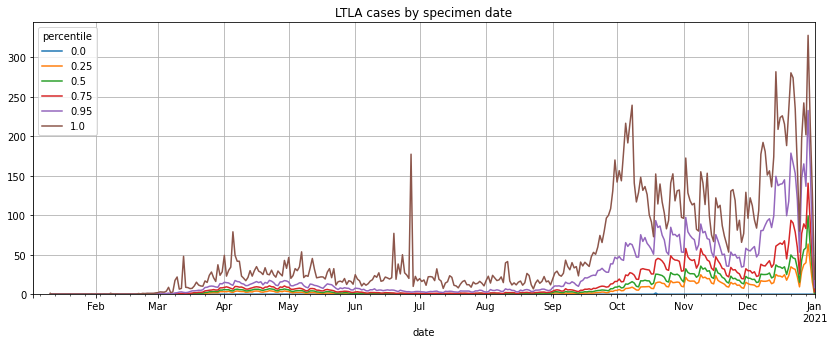

In [71]:
plot_quantiles(with_population(best_data()[0]).reset_index(), per100k, title='LTLA cases by specimen date')

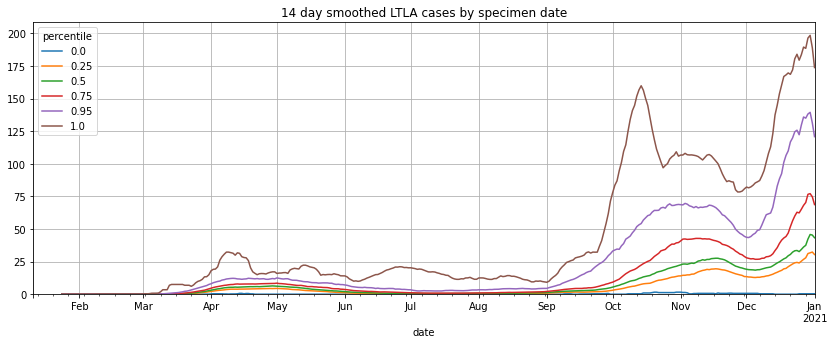

In [72]:
plot_quantiles(ltla_map_data()[0].reset_index(), per100k, title='14 day smoothed LTLA cases by specimen date')

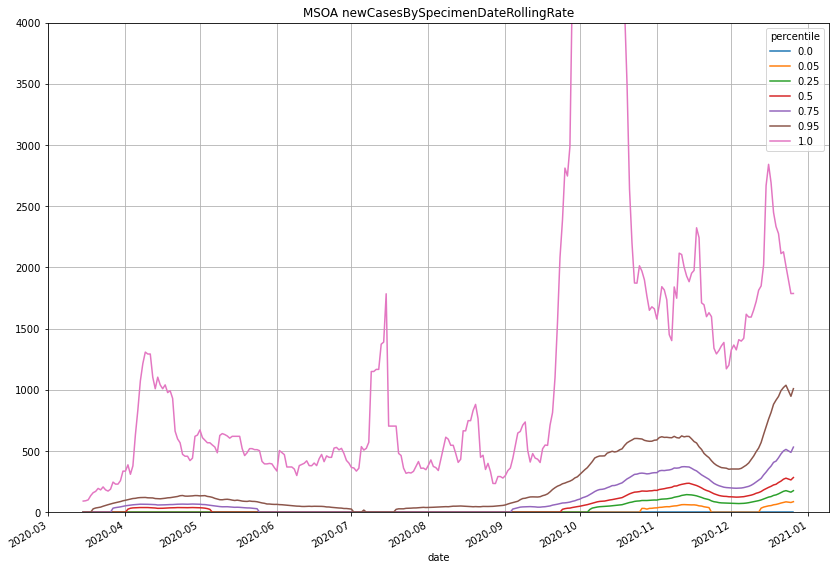

In [107]:
plot_quantiles(msoa_map_data().reset_index(), new_cases_rate, title='MSOA '+new_cases_rate, 
               ymax=4000, height=10, percentiles=(0, 0.05, 0.25, 0.5, 0.75, 0.95, 1))

In [103]:
newCasesBySpecimenDateRollingRate = msoa_map_data()['newCasesBySpecimenDateRollingRate']

In [106]:
newCasesBySpecimenDateRollingRate.count()

1942226

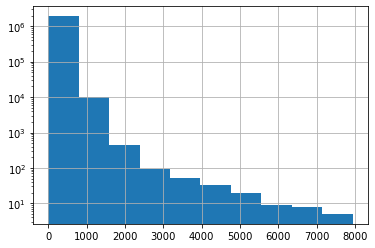

In [104]:
newCasesBySpecimenDateRollingRate.hist(log=True)

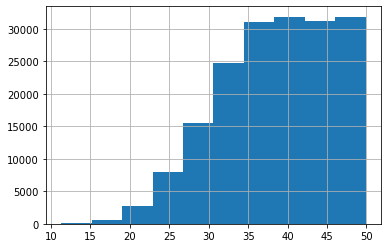

In [105]:
newCasesBySpecimenDateRollingRate[(newCasesBySpecimenDateRollingRate>0) & (newCasesBySpecimenDateRollingRate<50)].hist()